## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


#Combine the data into a single dataset

MouseMetaStudyResults = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

#Display the data table for preview

MouseMetaStudyResults


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [111]:
# Checking the number of mice.
MouseMetaStudyResults

TotalNumberOfMice = len(MouseMetaStudyResults["Mouse ID"].unique())

TotalNumberOfMice


249

In [109]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
Reduced_Mice_Data = MouseMetaStudyResults.loc[:,  ["Mouse ID", "Timepoint"]]

Reduced_Mice_Data["Mouse ID"].duplicated()

Reduced_Mice_Data = MouseMetaStudyResults.loc[MouseMetaStudyResults.duplicated(subset=["Mouse ID", "Timepoint"])]

Reduced_Mice_Data

DuplicateIds = Reduced_Mice_Data["Mouse ID"].unique()

DuplicateIds[0]


'g989'

In [112]:
# Optional: Get all the data for the duplicate mouse ID.

Reduced_Mice_Data





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [113]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


CleanData = MouseMetaStudyResults.loc[MouseMetaStudyResults["Mouse ID"]!="g989"]

CleanData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [114]:
# Checking the number of mice in the clean DataFrame.

CleanData

CleanNumberOfMice = len(CleanData["Mouse ID"].unique())

CleanNumberOfMice


248

## Summary Statistics

In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = CleanData.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = CleanData.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = CleanData.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
StdDev = CleanData.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
Sem = CleanData.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


Summary_Statistics = pd.DataFrame({"Mean":means,"Median":median, "Variance":variance, "Standard Deviation": StdDev, "SEM":Sem})
Summary_Statistics 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_table = CleanData.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var" , "std", "sem"]})

summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

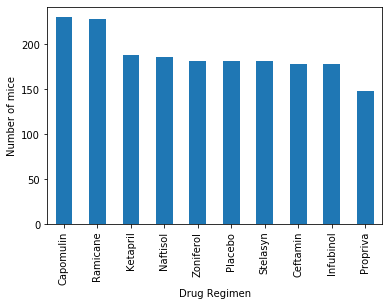

In [120]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice = CleanData["Drug Regimen"].value_counts()
unique_mice.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.show()


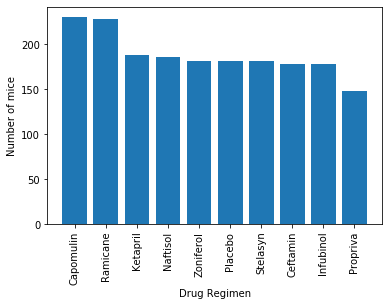

In [124]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

unique_mice = CleanData["Drug Regimen"].value_counts()
plt.bar(unique_mice.index.values, unique_mice.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.xticks(rotation = 90)
plt.show()



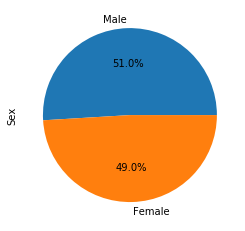

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

unique_mice = CleanData["Sex"].value_counts()
unique_mice.plot(kind="pie", autopct="%1.1f%%")

plt.show()




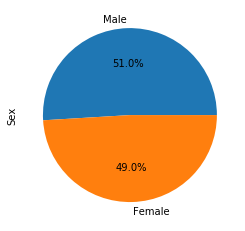

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
unique_mice = CleanData["Sex"].value_counts()
plt.pie(unique_mice.values, labels = unique_mice.index.values,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [140]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

LastTime = CleanData.groupby("Mouse ID").max()["Timepoint"]
LastTime = LastTime.reset_index()
LastTime


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

MergedData = LastTime.merge(CleanData,on=["Mouse ID", "Timepoint"],how="left")
MergedData


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [147]:
# Put treatments into a list for for loop (and later for plot labels)

Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



# Create empty list to fill with tumor vol data (for plotting)

VolumeList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for Treatment in Treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    TumorVolume = MergedData.loc[MergedData["Drug Regimen"]==Treatment]["Tumor Volume (mm3)"]
    
    # add subset 
    VolumeList.append(TumorVolume)
    
    
    # Determine outliers using upper and lower bounds
    
    quartiles = TumorVolume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(Treatment)
    print(f"The lower quartile of Tumor Volume is: {lowerq}")
    print(f"The upper quartile of Tumor Volume is: {upperq}")
    print(f"The interquartile range of Tumor Volume is: {iqr}")
    print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("")

Capomulin
The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol
The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin
The lower quartile of Tumor

<function matplotlib.pyplot.show(*args, **kw)>

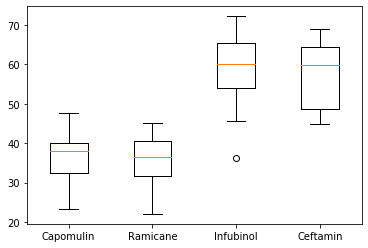

In [148]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(VolumeList,labels=Treatments)
plt.show



## Line and Scatter Plots

In [153]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin = CleanData.loc[(CleanData["Drug Regimen"]=="Capomulin") & (CleanData["Mouse ID"]=="s185")]
Capomulin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


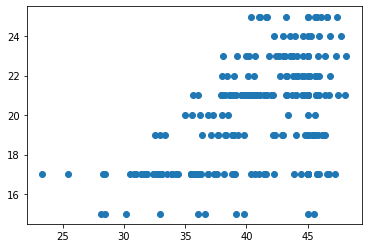

In [218]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
CapomulinData = CleanData.loc[CleanData["Drug Regimen"]=="Capomulin"]

x_axis = CapomulinData["Tumor Volume (mm3)"]
y_axis = CapomulinData["Weight (g)"]

plt.scatter(x_axis,y_axis)

plt.xlabel = ("Tumor Volume(mm3)")
plt.ylabel = ("Weight(g)")
plt.show()



## Correlation and Regression

The correlation coefficient between Tumor Volume and weight is 0.53


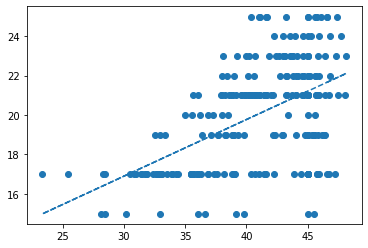

In [222]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between Tumor Volume and weight is {round(st.pearsonr(x_axis,y_axis)[0],2)}")

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_axis, y_axis)
vc_fit = vc_slope * x_axis + vc_int
x_axis = CapomulinData["Tumor Volume (mm3)"]
y_axis = CapomulinData["Weight (g)"]
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,vc_fit,"--")
plt.xlabel = ("Tumor Volume(mm3)")
plt.ylabel = ("Weight(g)")
plt.show()
